<a href="https://colab.research.google.com/github/El-Do-RaDo/CNN-MNIST-DIGITS/blob/master/CNN_tensorflow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm


In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


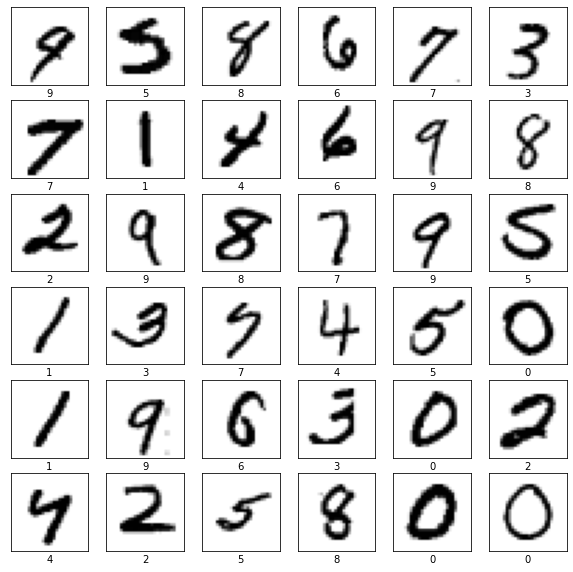

In [0]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [0]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dense(10, activation='softmax')

      
      
  ])
  return fc_model

model = build_fc_model()

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3688 - accuracy: 0.8982
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1991 - accuracy: 0.9430
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1508 - accuracy: 0.9571
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1219 - accuracy: 0.9652
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1027 - accuracy: 0.9708


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9680
Test accuracy: 0.9679999947547913


In [0]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        
        tf.keras.layers.Conv2D(24, kernel_size=3, activation='relu'), 

        
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

        
        tf.keras.layers.Conv2D(36, kernel_size=3, activation='relu'),

        
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()

cnn_model.predict(train_images[[0]])

print(cnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            multiple                  240       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_5 (Conv2D)            multiple                  7812      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  115328    
Total params: 123,380
Trainable params: 123,380
Non-trainable params: 0
________________________________________________

In [0]:
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
BATCH_SIZE = 64
EPOCHS = 5

cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 33s 35ms/step - loss: 3.8005 - accuracy: 0.0986
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 3.7890 - accuracy: 0.0986
Epoch 3/5
938/938 [==============================] - 32s 35ms/step - loss: 3.7884 - accuracy: 0.0986
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 3.7884 - accuracy: 0.0986
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 3.7884 - accuracy: 0.0986


In [0]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 3.7768 - accuracy: 0.0958
Test accuracy: 0.0957999974489212


In [0]:
predictions = cnn_model.predict(test_images)
predictions[0]

array([ 0.       ,  5.5141454,  5.3160105,  2.2579565,  3.076594 ,
        2.3886588, 24.705425 ,  4.090553 , 14.856468 ,  8.772179 ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.    

In [0]:
prediction = np.argmax(predictions[0])

print(prediction)

6


Label of this digit is: 7


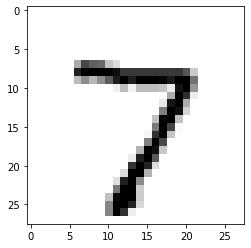

In [0]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)
